<a href="https://colab.research.google.com/github/alifmaghriby/Machine_Learning/blob/main/Alif_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. DATA PREPARATION**

In [ ]:
import pandas as pd

In [ ]:
# Membaca dataset dari file CSV
data = pd.read_csv('/content/dataset.csv')

In [ ]:
# Menampilkan beberapa baris pertama data untuk memahami struktur
print(data.head())


      X  id_tanggal_transaksi_awal  tanggal_transaksi_awal  tipe_kartu  \
0  4676                    2457646                 2457726         111   
1   788                    2457419                 2457507         111   
2  1520                    2457521                 2457612           2   
3  9346                    2457659                 2457746         103   
4  2914                    2457311                 2457385           0   

   id_merchant  nama_merchant  tipe_mesin  tipe_transaksi  nama_transaksi  \
0           -2           1798     2605127              26              10   
1           -2           1798          -3             156              12   
2           -2           1798          -3             156              12   
3        75336            249     2806174              58               6   
4           -2           1798     2334932              26              10   

   nilai_transaksi  ...  nama_channel  id_channel  flag_transaksi_finansial  \
0        2200

In [ ]:
# Memeriksa informasi dasar tentang dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   X                           13125 non-null  int64  
 1   id_tanggal_transaksi_awal   13125 non-null  int64  
 2   tanggal_transaksi_awal      13125 non-null  int64  
 3   tipe_kartu                  13125 non-null  int64  
 4   id_merchant                 13125 non-null  int64  
 5   nama_merchant               13125 non-null  int64  
 6   tipe_mesin                  13125 non-null  int64  
 7   tipe_transaksi              13125 non-null  int64  
 8   nama_transaksi              13125 non-null  int64  
 9   nilai_transaksi             13125 non-null  float64
 10  id_negara                   13125 non-null  int64  
 11  nama_negara                 13125 non-null  int64  
 12  nama_kota                   13125 non-null  int64  
 13  lokasi_mesin                131

In [ ]:
# Memeriksa jumlah nilai yang hilang dalam setiap kolom
missing_values = data.isnull().sum()
print("Jumlah nilai yang hilang dalam setiap kolom:")
print(missing_values)

Jumlah nilai yang hilang dalam setiap kolom:
X                              0
id_tanggal_transaksi_awal      0
tanggal_transaksi_awal         0
tipe_kartu                     0
id_merchant                    0
nama_merchant                  0
tipe_mesin                     0
tipe_transaksi                 0
nama_transaksi                 0
nilai_transaksi                0
id_negara                      0
nama_negara                    0
nama_kota                      0
lokasi_mesin                   0
pemilik_mesin                  0
waktu_transaksi                0
kuartal_transaksi              0
kepemilikan_kartu              0
nama_channel                   0
id_channel                     0
flag_transaksi_finansial       0
status_transaksi               0
bank_pemilik_kartu             0
rata_rata_nilai_transaksi     21
maksimum_nilai_transaksi      21
minimum_nilai_transaksi       21
rata_rata_jumlah_transaksi    21
flag_transaksi_fraud           0
dtype: int64


In [ ]:
# Mengatasi nilai-nilai yang hilang (misalnya, dengan mengisi nilai rata-rata atau median)
# Contoh mengisi nilai-nilai yang hilang dalam kolom 'nilai_transaksi' dengan nilai median
median_nilai_transaksi = data['nilai_transaksi'].median()
data['nilai_transaksi'].fillna(median_nilai_transaksi, inplace=True)

In [ ]:
# Menghapus duplikasi data (jika diperlukan)
# data.drop_duplicates(inplace=True)

In [ ]:
# Menyimpan dataset yang telah diolah
data.to_csv('dataset_clean.csv', index=False)


**2. Deteksi anomali seperti Z-Score dan algoritma seperti Isolation Forest untuk mengidentifikasi transaksi yang mencurigakan**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


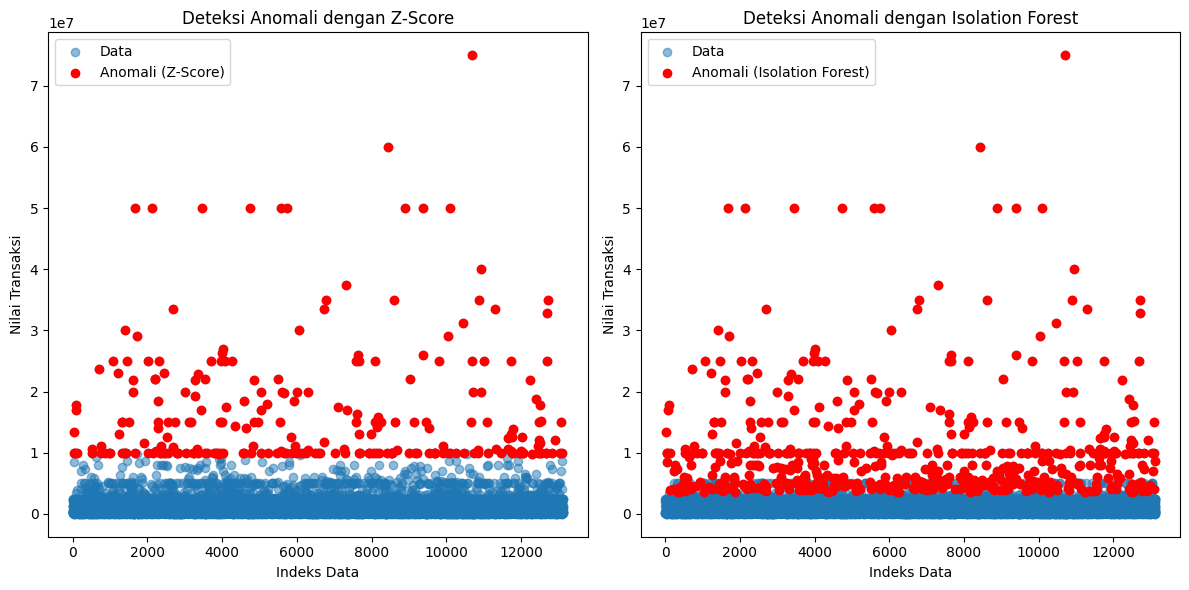

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.ensemble import IsolationForest

# Membaca dataset dari file CSV
data = pd.read_csv('/content/dataset_clean.csv')

# Menghapus nilai-nilai yang hilang
data.dropna(subset=['nilai_transaksi'], inplace=True)

# Deteksi Anomali dengan Z-Score
z_scores = np.abs(stats.zscore(data['nilai_transaksi']))
threshold = 3  # Ubah threshold sesuai kebutuhan
anomalies_zscore = data[abs(z_scores) > threshold]

# Deteksi Anomali dengan Isolation Forest
X = data[['nilai_transaksi']]
model = IsolationForest(contamination=0.05)  # Ubah tingkat kontaminasi sesuai kebutuhan
model.fit(X)
anomalies_isolation_forest = data[model.predict(X) == -1]

# Visualisasi hasil deteksi anomali
plt.figure(figsize=(12, 6))

# Hasil deteksi anomali dengan Z-Score
plt.subplot(1, 2, 1)
plt.scatter(data.index, data['nilai_transaksi'], label='Data', alpha=0.5)
plt.scatter(anomalies_zscore.index, anomalies_zscore['nilai_transaksi'], color='red', label='Anomali (Z-Score)')
plt.title('Deteksi Anomali dengan Z-Score')
plt.xlabel('Indeks Data') #--> kolom baru yang dibuat dari nilai transaksi yang di count
plt.ylabel('Nilai Transaksi')
plt.legend()

# Hasil deteksi anomali dengan Isolation Forest
plt.subplot(1, 2, 2)
plt.scatter(data.index, data['nilai_transaksi'], label='Data', alpha=0.5)
plt.scatter(anomalies_isolation_forest.index, anomalies_isolation_forest['nilai_transaksi'], color='red', label='Anomali (Isolation Forest)')
plt.title('Deteksi Anomali dengan Isolation Forest')
plt.xlabel('Indeks Data') #--> kolom baru yang dibuat dari nilai transaksi yang di count
plt.ylabel('Nilai Transaksi')
plt.legend()

plt.tight_layout()
plt.show()


3. Mengelompokkan transaksi menggunakan algoritma clustering seperti K-Means. Ini dapat membantu mengidentifikasi kelompok transaksi yang mungkin mencurigakan.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


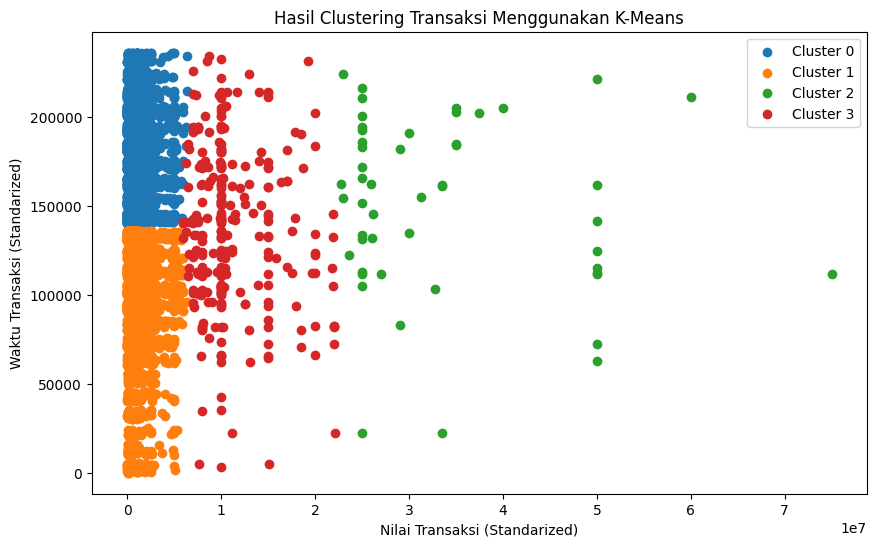

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Membaca dataset dari file CSV
data = pd.read_csv('/content/dataset_clean.csv')

# Menghapus nilai-nilai yang hilang (jika diperlukan)
data.dropna(subset=['nilai_transaksi', 'waktu_transaksi'], inplace=True)

# Menggunakan hanya dua kolom yang akan digunakan dalam clustering
X = data[['nilai_transaksi', 'waktu_transaksi']]

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menentukan jumlah cluster (K) yang sesuai
# Anda bisa menggunakan metode seperti Elbow Method untuk menentukan K
# Dalam contoh ini, kita akan menggunakan K=4 sebagai contoh
kmeans = KMeans(n_clusters=4, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
for cluster_num in range(4):
    cluster_data = data[data['cluster'] == cluster_num]
    plt.scatter(cluster_data['nilai_transaksi'], cluster_data['waktu_transaksi'], label=f'Cluster {cluster_num}')

plt.title('Hasil Clustering Transaksi Menggunakan K-Means')
plt.xlabel('Nilai Transaksi (Standarized)')
plt.ylabel('Waktu Transaksi (Standarized)')
plt.legend()
plt.show()


**4. Membangun model prediktif, seperti regresi logistik atau random forest, untuk memprediksi apakah suatu transaksi mencurigakan berdasarkan fitur-fitur yang ada.**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Membaca dataset dari file CSV
data = pd.read_csv('/content/dataset_clean.csv')

# Menghapus nilai-nilai yang hilang dalam kolom 'nilai_transaksi' (atau sesuaikan dengan kolom yang mengandung NaN)
data.dropna(subset=['nilai_transaksi'], inplace=True)

# Memisahkan fitur (X) dan target (y)
X = data.drop(['flag_transaksi_fraud'], axis=1)  # Menghapus kolom target dari fitur
y = data['flag_transaksi_fraud']  # Kolom target

# Melakukan encoding untuk kolom-kolom kategorikal jika diperlukan
X = pd.get_dummies(X, columns=['tipe_kartu', 'nama_negara', 'nama_kota'])

# Membagi dataset menjadi data latih (train) dan data uji (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mengisi nilai-nilai NaN dengan nilai rata-rata dari masing-masing kolom
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Membangun model Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Memprediksi data uji
y_pred = clf.predict(X_test)

# Mengukur performa model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Menampilkan hasil performa model
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)


Accuracy: 0.94

Confusion Matrix:
[[2433   11]
 [ 143   38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2444
           1       0.78      0.21      0.33       181

    accuracy                           0.94      2625
   macro avg       0.86      0.60      0.65      2625
weighted avg       0.93      0.94      0.93      2625



**5. Analisis Nilai Transaksi: Lihat statistik terkait nilai transaksi seperti rata-rata, maksimum, dan minimum. Cari tahu apakah ada transaksi yang jauh dari rata-rata atau melebihi batas tertentu.**

In [ ]:
import pandas as pd
import numpy as np

# Membaca dataset dari file CSV
data = pd.read_csv('/content/dataset_clean.csv')

# Memeriksa statistik nilai transaksi
nilai_transaksi = data['nilai_transaksi']

# Menghitung statistik dasar
rata_rata = nilai_transaksi.mean()
nilai_max = nilai_transaksi.max()
nilai_min = nilai_transaksi.min()

# Menentukan batas untuk transaksi yang mencurigakan (misalnya, 3 deviasi standar dari rata-rata)
batas_atas = rata_rata + 3 * nilai_transaksi.std()
batas_bawah = rata_rata - 3 * nilai_transaksi.std()

# Menemukan transaksi yang melebihi batas atas atau di bawah batas bawah
transaksi_mencurigakan = data[(nilai_transaksi > batas_atas) | (nilai_transaksi < batas_bawah)]

# Menampilkan statistik dan transaksi yang mencurigakan
print(f'Rata-rata Nilai Transaksi: {rata_rata:.2f}')
print(f'Nilai Transaksi Maksimum: {nilai_max:.2f}')
print(f'Nilai Transaksi Minimum: {nilai_min:.2f}')

print(f'\nBatas Atas (3 Deviasi Standar): {batas_atas:.2f}')
print(f'Batas Bawah (3 Deviasi Standar): {batas_bawah:.2f}')

print('\nTransaksi yang Mencurigakan:')
print(transaksi_mencurigakan)


Rata-rata Nilai Transaksi: 1315218.82
Nilai Transaksi Maksimum: 75000000.00
Nilai Transaksi Minimum: 1.00

Batas Atas (3 Deviasi Standar): 9829368.98
Batas Bawah (3 Deviasi Standar): -7198931.34

Transaksi yang Mencurigakan:
          X  id_tanggal_transaksi_awal  tanggal_transaksi_awal  tipe_kartu  \
23     8743                    2457369                 2457452          93   
48     8396                    2457511                 2457574          93   
54     6120                    2457529                 2457606         103   
76     6900                    2457376                 2457403         111   
99      891                    2457544                 2457601          93   
...     ...                        ...                     ...         ...   
12822   563                    2457385                 2457442          93   
12912  1288                    2457396                 2457479           1   
13044  8880                    2457348                 2457379          9

**6. Deteksi Penipuan (Fraud Detection) dengan fokus pada kolom "flag_transaksi_fraud" dan mencari pola-pola yang berkaitan dengan penipuan**

Frekuensi Flag Transaksi Fraud:
0    12215
1      910
Name: flag_transaksi_fraud, dtype: int64

Persentase Flag Transaksi Fraud:
0    93.066667
1     6.933333
Name: flag_transaksi_fraud, dtype: float64


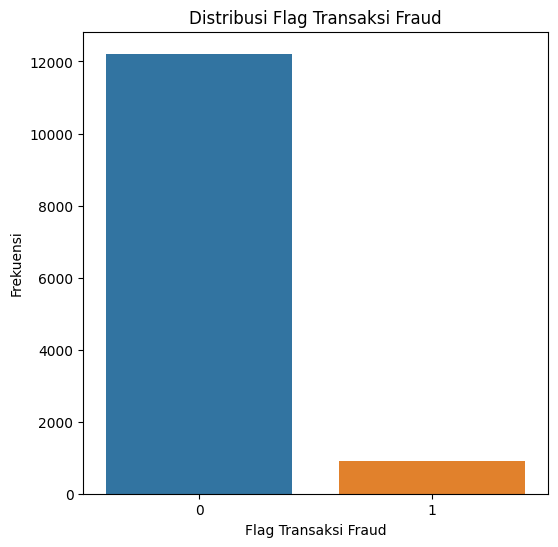

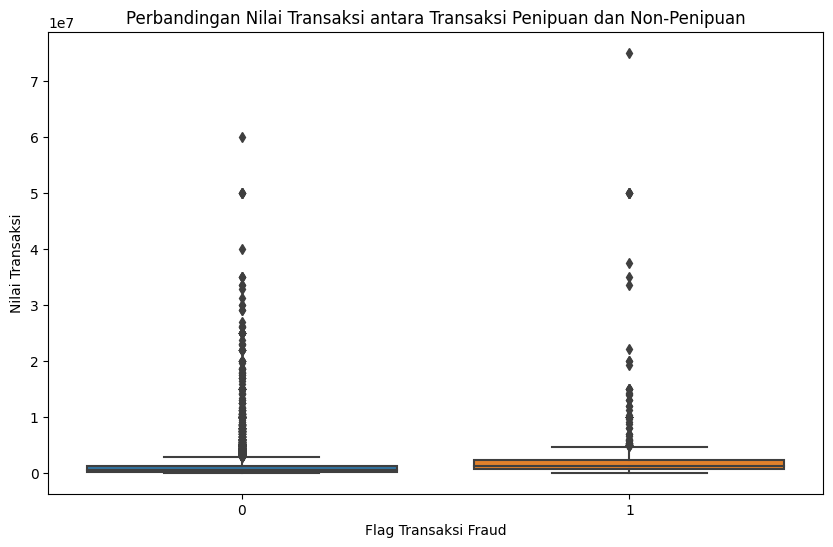

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset dari file CSV
data = pd.read_csv('/content/dataset_clean.csv')

# Menampilkan statistik sederhana dari kolom "flag_transaksi_fraud"
fraud_counts = data['flag_transaksi_fraud'].value_counts()
fraud_percentage = data['flag_transaksi_fraud'].value_counts(normalize=True) * 100

print("Frekuensi Flag Transaksi Fraud:")
print(fraud_counts)
print("\nPersentase Flag Transaksi Fraud:")
print(fraud_percentage)

# Visualisasi distribusi "flag_transaksi_fraud"
plt.figure(figsize=(6, 6))
sns.countplot(data=data, x='flag_transaksi_fraud')
plt.title('Distribusi Flag Transaksi Fraud')
plt.xlabel('Flag Transaksi Fraud')
plt.ylabel('Frekuensi')
plt.show()

# Analisis lebih lanjut dengan membandingkan fitur-fitur terkait penipuan
fraud_data = data[data['flag_transaksi_fraud'] == True]
non_fraud_data = data[data['flag_transaksi_fraud'] == False]

# Contoh: Membandingkan nilai transaksi antara transaksi penipuan dan non-penipuan
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='flag_transaksi_fraud', y='nilai_transaksi')
plt.title('Perbandingan Nilai Transaksi antara Transaksi Penipuan dan Non-Penipuan')
plt.xlabel('Flag Transaksi Fraud')
plt.ylabel('Nilai Transaksi')
plt.show()